# t-SNE

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load Data

In [2]:
DATA_DIR = '../../data/raw/full/'

In [3]:
import pandas as pd

train_data = pd.read_csv(DATA_DIR + 'train.csv')

train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53188 entries, 0 to 53187
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 45.4 MB


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,8,1,1,5,0,0,0,0,0,0,...,1,4,0,11,1,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,1,1,1,21592,0,0,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,4,4,2,194,1,1,0,0,0,0
3,3,0,0,6,0,0,0,0,0,0,...,1,2,1,3165,0,0,0,0,0,1
4,3,0,0,0,0,0,0,0,0,0,...,1,2,5,4914,0,-1,0,0,0,0


## t-SNE

In [4]:
TARGET_COL_NAME = 'phishing'

In [5]:
X_train = train_data.drop(TARGET_COL_NAME, axis=1)

X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53188 entries, 0 to 53187
Columns: 111 entries, qty_dot_url to url_shortened
dtypes: float64(1), int64(110)
memory usage: 45.0 MB


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,8,1,1,5,0,0,0,0,0,0,...,-1,1,4,0,11,1,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,1992,1,1,1,21592,0,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,283,4,4,2,194,1,1,0,0,0
3,3,0,0,6,0,0,0,0,0,0,...,491,1,2,1,3165,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,-1,1,2,5,4914,0,-1,0,0,0


In [6]:
y_train = train_data[TARGET_COL_NAME]
y_train.shape

(53188,)

In [7]:
from sklearn.manifold import TSNE

TSNE_COMPONENTS = 2
RANDOM_STATE = 42

# t-SNE
tsne_data = TSNE(n_components=TSNE_COMPONENTS, random_state=RANDOM_STATE, n_jobs=-1).fit_transform(X_train)

C:\Users\JanciJen\.conda\envs\Phishing-Classification\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\JanciJen\.conda\envs\Phishing-Classification\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [8]:
tsne_data.shape

(53188, 2)

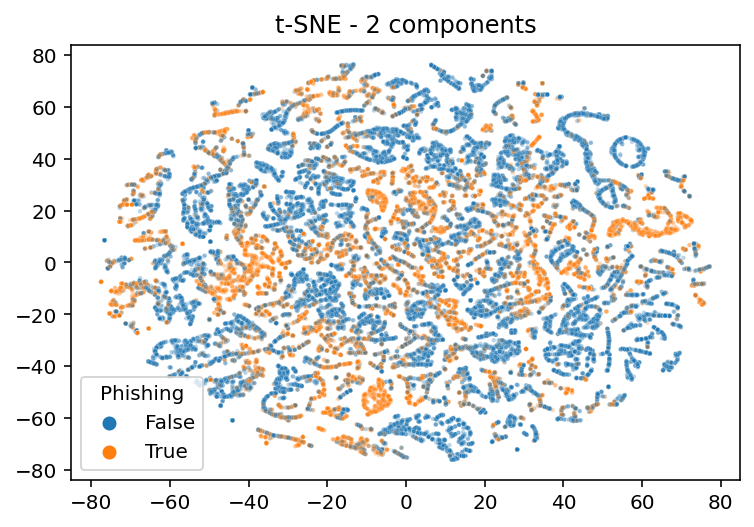

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

MARKER_SIZE = 5
ALPHA = 0.3

title = 't-SNE - {} components'.format(TSNE_COMPONENTS)

y_labels = y_train.astype(bool)
y_labels.name = 'Phishing'

sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], hue=y_labels, alpha=ALPHA, s=MARKER_SIZE).set_title(title);